 ## Bootstrapping with airline data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
air = pd.read_csv('./datasets/airport_operations.csv')

In [3]:
air.head(3)

,airport,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
0,ABQ,2004,53971,53818,0.8030,0.7809,0.7921,10.38,9.89,2.43,12.10,2.46,0.83,2.55,10.87
1,ABQ,2005,51829,51877,0.8140,0.7922,0.8001,9.60,9.79,2.29,11.20,2.26,0.89,2.34,10.24
2,ABQ,2006,49682,51199,0.7983,0.7756,0.7746,10.84,9.89,2.16,12.33,2.12,0.84,2.66,11.82


In [4]:
a = air.drop(['departures for metric computation', 'arrivals for metric computation'], axis=1)

In [5]:
a.columns

Index([u'airport', u'year', u'percent on-time gate departures',
       u'percent on-time airport departures', u'percent on-time gate arrivals',
       u'average_gate_departure_delay', u'average_taxi_out_time',
       u'average taxi out delay', u'average airport departure delay',
       u'average airborne delay', u'average taxi in delay',
       u'average block delay', u'average gate arrival delay'],
      dtype='object')

In [8]:
avg_taxi_in_delay = a['average taxi in delay'].values

#avg_taxi_in_delay = np.random.choice(avg_taxi_in_delay, size=50)

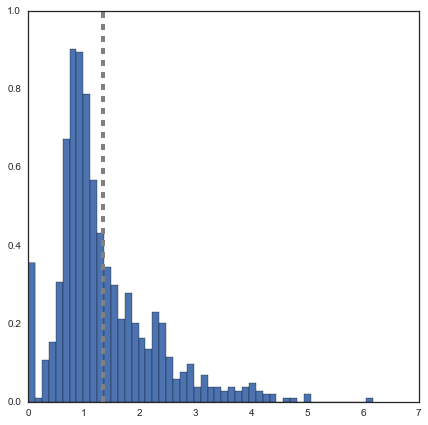

In [10]:
#n, bins, patches = plt.hist(x, 50, normed=1, facecolor='green', alpha=0.75)
sns.set_style('white')

mean_delay = np.mean(avg_taxi_in_delay)

plt.figure(figsize=(7,7))

plt.hist(avg_taxi_in_delay, 50, normed=1)

plt.axvline(mean_delay, lw=4, ls='dashed', c='gray')

plt.show()



In [41]:
# Intro to bootstrapping.

# Bootstrapping procedure:
# take random samples (with replacement) of our dataset the same size
# as our dataset.
# Calculate some kind of statistic on these random samples.

def bootstrap_mean(x, boot_iterations=1000):
    
    bootstrapped_means = []
    
    for i in range(boot_iterations):
        sample_x = np.random.choice(x, size=len(x), replace=True)
        sample_mean = np.mean(sample_x)
        bootstrapped_means.append(sample_mean)
        
    #return np.mean(bootstrapped_means)
    return bootstrapped_means
    
    

In [42]:
avg_taxi_boot_means = bootstrap_mean(avg_taxi_in_delay, boot_iterations=1000)
#print avg_taxi_boot_means
print np.mean(avg_taxi_in_delay)

1.3488941736


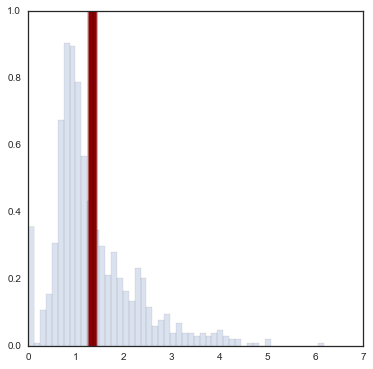

In [43]:
# PLOT 10 BOOTSTRAPPED MEANS:

mean_delay = np.mean(avg_taxi_in_delay)

plt.figure(figsize=(6,6))

plt.hist(avg_taxi_in_delay, 50, normed=1, alpha=0.2)

plt.axvline(mean_delay, lw=2, c='black')

for m in avg_taxi_boot_means:
    plt.axvline(m, lw=2, c='darkred', alpha=0.05)

plt.show()

In [44]:
vec = np.array([1,2,3,4,5,6,7,8,9])

In [45]:
probs = np.array([100,1,1,1,1,1,1,1,1])
probs = probs/float(np.sum(probs))
print probs
np.random.choice(vec, replace=True, size=len(vec), p=probs)

[ 0.92592593  0.00925926  0.00925926  0.00925926  0.00925926  0.00925926
  0.00925926  0.00925926  0.00925926]


array([1, 1, 1, 1, 1, 1, 1, 1, 1])

In [22]:
from numpy.random import gamma

In [24]:
r = gamma(0.5, 100, size=100).tolist()+np.logspace(3,4,10).tolist()
r = np.array(r)

In [26]:
np.logspace(3,4,10)

array([  1000.        ,   1291.54966501,   1668.1005372 ,   2154.43469003,
         2782.55940221,   3593.8136638 ,   4641.58883361,   5994.84250319,
         7742.63682681,  10000.        ])

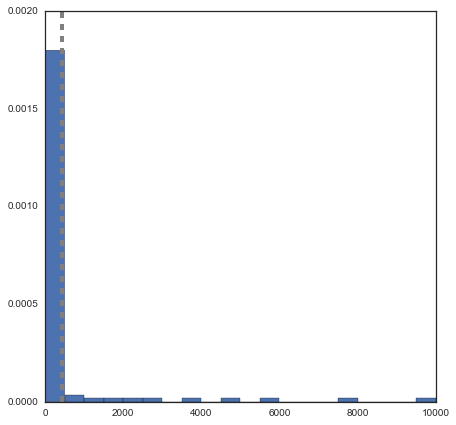

In [30]:
mean_r = np.mean(r)

plt.figure(figsize=(7,7))

plt.hist(r, 20, normed=1)

plt.axvline(mean_r, lw=4, ls='dashed', c='gray')

plt.show()


In [32]:
boot_r = bootstrap_mean(r, boot_iterations=75)


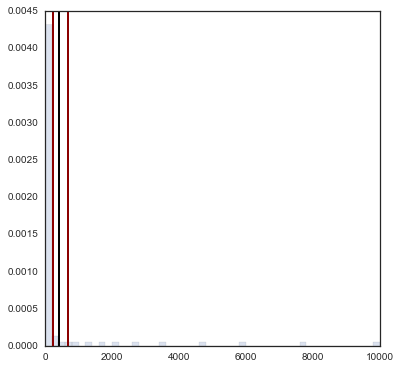

In [33]:
plt.figure(figsize=(6,6))

plt.hist(r, 50, normed=1, alpha=0.2)

plt.axvline(mean_r, lw=2, c='black')

#for m in boot_r:
#    plt.axvline(m, lw=2, c='darkred', alpha=0.01)

q01, q99 = np.percentile(boot_r, [1, 99])

plt.axvline(q01, lw=2, c='darkred')
plt.axvline(q99, lw=2, c='darkred')

plt.show()